<a href="https://colab.research.google.com/github/FB-Decipherer/Experiment-3/blob/main/Experiment-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install filetype

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (5,147 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [3]:
import cv2
import numpy as np
import pytesseract
import filetype
from google.colab.patches import cv2_imshow

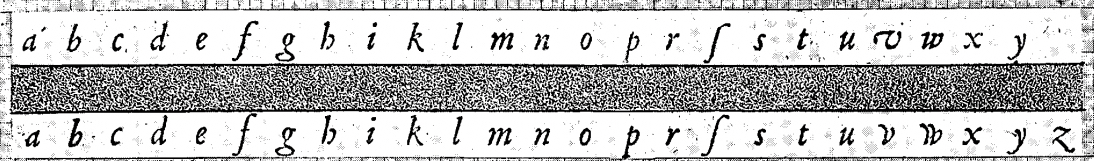

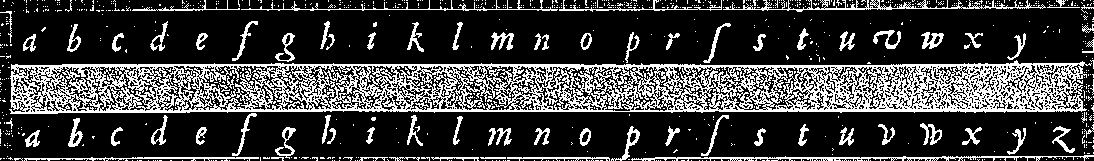

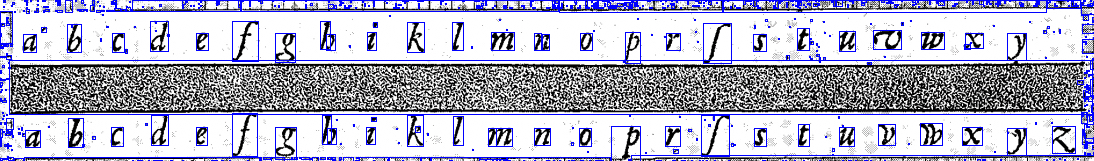

1 Fg AT ork ae dt a hatte EL a ke Le te il al a RE ia i hn AN MNase
ta bee de f gh ik lmnoprfs tuvwx ys
SS Se eee
Clr rr
4 : ° : 4
abe def ghikimnoprifis tuvwx y 2



In [4]:
def save_bounding_boxes(target_image):

  cv2_imshow(target_image)

  gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)
  bb_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(bb_image)

  # Draw bounding boxes
  cnts = cv2.findContours(bb_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  # Start coordinate, here (5, 5)
  # represents the top left corner of rectangle
  start_point = (5, 5)
  
  # Ending coordinate, here (220, 220)
  # represents the bottom right corner of rectangle
  end_point = (220, 220)

  color = (255, 0, 0)
  bb = 0

  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      cv2.rectangle(target_image, (x, y), (x + w, y + h), color, 1)
      roi = target_image[y:y+h, x:x+w]

      letters_path = '/content/drive/MyDrive/Templates/TC Letters/'
      letters_file_name = letters_path + str(bb) + '.jpg'
      cv2.imwrite(letters_file_name, roi)
      bb += 1
   

  # OCR
  ocr_text = pytesseract.image_to_string(255 - bb_image, lang='eng',config='--psm 6')

  #cv2_imshow(bb_image)
  cv2_imshow(target_image)
  return ocr_text
 
 
#target_image = cv2.imread('/content/drive/MyDrive/T & C Template Match 1623/Targets/eurotext-450×351.png')
target_image = cv2.imread('/content/drive/MyDrive/Classifiers/Original Full LC Templet.jpg')

ocr_text = save_bounding_boxes(target_image)
print(ocr_text)
